# Lógica do Segundo Exercício da Apostila

**Aluno:** Rafael Lúcio Negrão Cordeiro<br/>
**Matrícula:** 201310323<br/>
**Disciplina:** CET961 - Engenharia Assistida por Computador

In [1]:
import numpy as np

A1 = 32.3 # cm²
A2 = 38.7 # cm²
A3 = 25.8 # cm²

A = [A1, A2, A3] # Compactaçao dos valores de área em vetor

E1 = 6.9e10  # N / m
E2 = 20.7e10 # N / m
E3 = 20.7e10 # N / m

E = [E1, E2, E3] # Compactaçao dos módulos de elasticidade em vetor

L1 = 2.54 # m
L2 = 2.54 # m
L3 = 3.59 # m

L = [L1, L2, L3] # Compactaçao dos comprimentos em vetor

con1 = (2, 3)
con2 = (1, 2)
con3 = (1, 3)

alpha = np.array([90, 0, 135]) # Vetor criado com angulos em graus

F = 100e3 # kN
Fx = F * np.cos(225 * np.pi / 180) # 225 * np.pi / 180 é o angulo de 225 em radianos
Fy = F * np.sin(225 * np.pi / 180)

In [2]:
# Podemos definir a Lei de Hooke da seguinte forma
hooke = lambda E, A, L: E * A / L

# Transforma um angulo em graus, em radianos
radians = lambda alpha: alpha * np.pi / 180

k_4x4 = lambda alpha: np.mat([[np.cos(alpha) ** 2, np.cos(alpha) * np.sin(alpha), -np.cos(alpha) ** 2, -np.cos(alpha) * np.sin(alpha)],
                          [np.cos(alpha) * np.sin(alpha), np.sin(alpha) ** 2, -np.cos(alpha) * np.sin(alpha), -np.sin(alpha) ** 2],
                          [-np.cos(alpha) ** 2, -np.cos(alpha) * np.sin(alpha), np.cos(alpha) ** 2, np.cos(alpha) * np.sin(alpha)],
                          [-np.cos(alpha) * np.sin(alpha), -np.sin(alpha) ** 2, np.cos(alpha) * np.sin(alpha), np.sin(alpha) ** 2]])

u_4x2 = lambda alpha: np.mat([[np.cos(alpha), 0],
                              [np.sin(alpha), 0],
                              [0, np.cos(alpha)],
                              [0, np.sin(alpha)]])

t_2x4 = lambda alpha: np.mat([[np.cos(alpha), np.sin(alpha), 0, 0],
                              [0, 0, np.cos(alpha), np.sin(alpha)]])

# Definiçao da matriz K_U
# Aplicaçao da funçao da constante elástica para obter as forças resultantes
k_u_4x2 = lambda alpha, E, A, L: k_4x4(alpha) * u_4x2(alpha) * hooke(E, A, L) 

#### Compondo o sistema na notaçao matricial $[K_{i}^{(g)}]\{U_{i}^{(g)}\} = \{F_{i}^{(g)}\}$, temos:

$$
\begin{split}
    \overbrace{
        \begin{bmatrix}
            k_{1 x 1 (i)} & k_{1 x 2 (i)} & k_{1 x 3 (i)} & k_{1 x 4 (i)}\\
            k_{2 x 1 (i)} & k_{2 x 2 (i)} & k_{2 x 3 (i)} & k_{2 x 4 (i)}\\
            k_{3 x 1 (i)} & k_{3 x 2 (i)} & k_{3 x 3 (i)} & k_{3 x 4 (i)}\\
            k_{4 x 1 (i)} & k_{4 x 2 (i)} & k_{4 x 3 (i)} & k_{4 x 4 (i)}
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{Bmatrix}
            u_{iX}^E\\
            u_{iY}^E\\
            u_{iX}^D\\
            u_{iY}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}
    =
    \overbrace{
        \begin{Bmatrix}
            F_{iX}^{E}\\
            F_{iY}^{E}\\
            F_{iX}^{D}\\
            F_{iY}^{D}
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}\\
    \overbrace{
        \frac{E_iA_i}{L_i}
        \begin{bmatrix}
            \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i & -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i\\
            \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i & -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i\\
            -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i & \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i\\
            -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i & \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            u_{i}^E\\
            u_{i}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}=
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            F_{iX}^E\\
            F_{iX}^D
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}
\end{split}
$$

$$
\overbrace{
    \frac{E_iA_i}{L_i}
        \begin{bmatrix}
            \cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i & -\cos^3\alpha_i - \cos\alpha_i\sin^2\alpha_i\\
            \cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i & -\cos^2\alpha_i\sin\alpha_i - \sin^3\alpha_i\\
            -\cos^3\alpha_i - \cos\alpha_i\sin^2\alpha_i & \cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i\\
            -\cos^2\alpha_i\sin\alpha_i - \sin^3\alpha_i & \cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i
        \end{bmatrix}
}^{[K^{(g)}_i]}
\overbrace{
    \begin{Bmatrix}
        u_{i}^E\\
        u_{i}^D
    \end{Bmatrix}
}^{\{U^{(g)}_i\}}
=
\overbrace{
    \begin{Bmatrix}
        F_{iX}^{E}\\
        F_{iY}^{E}\\
        F_{iX}^{D}\\
        F_{iY}^{D}
    \end{Bmatrix}
}^{\{F^{(g)}_i\}}\\
$$

Com $F_{iX}^E=100kN\cos225^{\circ}=-70,710678kN\\
     F_{iY}^E=100kN\sin225^{\circ}=-70,710678kN\\
     u_{iX}^D=0$

$$
\overbrace{
    \frac{E_iA_i}{L_i}
    \begin{bmatrix}
        \cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i & -\cos^3\alpha_i - \cos\alpha_i\sin^2\alpha_i\\
        \cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i & -\cos^2\alpha_i\sin\alpha_i - \sin^3\alpha_i\\
        -\cos^3\alpha_i - \cos\alpha_i\sin^2\alpha_i & \cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i\\
        -\cos^2\alpha_i\sin\alpha_i - \sin^3\alpha_i & \cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i
    \end{bmatrix}
    \begin{Bmatrix}
        u_{i}^E\\
        0
    \end{Bmatrix}
}^{\{K^{(g)}_i\}\{U^{(g)}_i\}}
=
\overbrace{
    \begin{Bmatrix}
        -70,710678kN\\
        -70,710678kN\\
        F_{iX}^{D}\\
        F_{iY}^{D}
    \end{Bmatrix}
}^{\{F^{(g)}_i\}}
$$

Representando em forma de sistema, temos:

$$
\begin{equation}
    \frac{E_iA_i}{L_i}
    x
    \begin{cases}
        (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{i}^E = \cos\alpha_iF_{iX}^E + 0F_{i}^D\\
        (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{i}^E = \sin\alpha_iF_{iY}^E + 0F_{i}^D\\
        -(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{i}^E = 0F_{iX}^E + \cos\alpha_iF_{i}^D\\
        -(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{i}^E = 0F_{iY}^E + \sin\alpha_iF_{i}^D
    \end{cases}
    \Rightarrow
    \begin{cases}
        \frac{E_iA_i}{L_i}((\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{i}^E + 0) - 0F_{iX}^D = \cos\alpha_iF_{i}^E\\
        \frac{E_iA_i}{L_i}((\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{i}^E + 0) - 0F_{iY}^D = \sin\alpha_iF_{i}^E\\
        \frac{E_iA_i}{L_i}(-(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{i}^E + 0) - \cos\alpha_iF_{iX}^D = 0F_{i}^E\\
        \frac{E_iA_i}{L_i}(-(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{i}^E + 0) - \sin\alpha_iF_{iY}^D = 0F_{i}^E
    \end{cases}\\
    \begin{cases}
        \frac{E_iA_i}{L_i}((\cos^3\alpha_iu_{iX}^E + \cos\alpha_i\sin^2\alpha_iu_{iY}^E) + 0(-(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)) - 0F_{i}^D = \cos\alpha_iF_{i}^E\\
        \frac{E_iA_i}{L_i}((\cos^2\alpha_i\sin\alpha_iu_{iX}^E + \sin^3\alpha_iu_{iY}^E) + 0(-(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)) - 0F_{i}^D = \sin\alpha_iF_{i}^E\\
        \frac{E_iA_i}{L_i}(-(\cos^3\alpha_iu_{iX}^E + \cos\alpha_i\sin^2\alpha_iu_{iY}^E) + 0(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i) - \cos\alpha_iF_{i}^D = 0F_{i}^E\\
        \frac{E_iA_i}{L_i}(-(\cos^2\alpha_i\sin\alpha_iu_{iX}^E + \sin^3\alpha_iu_{iY}^E) + 0(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i) - \sin\alpha_iF_{i}^D = 0F_{i}^E
    \end{cases}
\end{equation}
$$

Nesse último sistema, apesar de $u_{iX}^D=0$, os índices dele foram colocados em posiçao devido ao fato da matriz que resolve o sistema receber os índices de todas variáveis. Independente se a variável é zero.

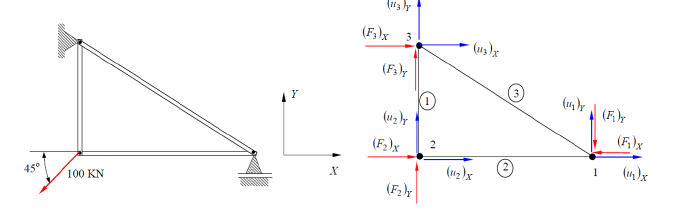

In [3]:
from itertools import cycle

i = cycle(map(k_u_4x2, map(radians, alpha), E, A, L))

j = next(i)

In [4]:
print(f'{j = !r}, onde a primeira coluna representa os índices da variável de deslocamento uiE, e a segunda coluna representa os índices da variável de deslocamento uiD')

j = matrix([[ 5.37277622e-05, -5.37277622e-05],
        [ 8.77440945e+11, -8.77440945e+11],
        [-5.37277622e-05,  5.37277622e-05],
        [-8.77440945e+11,  8.77440945e+11]]), onde a primeira coluna representa os índices da variável de deslocamento uiE, e a segunda coluna representa os índices da variável de deslocamento uiD


#### Como, nesse caso, o primeiro elemento tem restriçao de movimento em X e em Y na extremidade superior $U_i^D = 0$, portanto, a matrix j acima será multiplicada pela matrix abaixo tal que a coluna dos índices da variável $U_i^D$ seja zerada:
$$
\begin{bmatrix}
    1 & 0\\
    0 & 0
\end{bmatrix}
$$

In [5]:
j = j * [[1, 0],
         [0, 0]]

print(f'{j = !r}')

j = matrix([[ 5.37277622e-05,  0.00000000e+00],
        [ 8.77440945e+11,  0.00000000e+00],
        [-5.37277622e-05,  0.00000000e+00],
        [-8.77440945e+11,  0.00000000e+00]])


#### Ainda falta a coluna dos índices da variável $F_{i}^D$ representada pela matrix $\begin{bmatrix}0\\0\\0\\-1\end{bmatrix}$

In [6]:
j = np.append(j, [[0],
                  [0], 
                  [0], 
                  [-1]], axis=1).round(decimals=3)
j

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.77440945e+11,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.77440945e+11,  0.00000000e+00, -1.00000000e+00]])

In [7]:
j = np.delete(j, np.where(~j.any(axis=1))[0], axis=0) # Reduçao da matrix, retirando colunas iguais a zero
j = np.delete(j.T, np.where(~j.T.any(axis=1))[0], axis=0).T # Reduçao da matrix, retirando linhas iguais a zero

print(j)

image = [Fx, 0]

[[ 8.77440945e+11  0.00000000e+00]
 [-8.77440945e+11 -1.00000000e+00]]


In [12]:
print('Deslocamento do nó 2, na vertical = %.2emm\nForça horizontal exercida pela extremidade superior do ' % tuple(np.linalg.solve(j, image)))

TypeError: not all arguments converted during string formatting

In [13]:
len(np.linalg.solve(j, image))

2